In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import fnmatch
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from sklearn.manifold import TSNE
import json

In [2]:
path = 'F:\Music_Notes'

In [3]:
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d .wav files in %s"%(len(files),path))

found 50 .wav files in F:\Music_Notes


In [4]:
def get_features(y, sr):
    y = y[0:sr]
    S = librosa.feature.melspectrogram(y,sr=sr, n_mels=128)
    log_S = librosa.amplitude_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
    delta_mfcc = librosa.feature.delta(mfcc, mode='nearest')
    delta2_mfcc = librosa.feature.delta(mfcc, order=2, mode='nearest')
    feature_vector = np.concatenate((np.mean(mfcc,1), np.mean(delta_mfcc,1), np.mean(delta2_mfcc,1)))
    feature_vector = (feature_vector-np.mean(feature_vector)) / np.std(feature_vector)
    return feature_vector

In [5]:
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
   # if i % 100 == 0:  this was because there were 6000 sounds in original dataset and printing every single is lengthy
    print("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f)
        if len(y) < 2:
            print("error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except:
        print("error loading %s" % f)
        
print("calculated %d feature vectors"%len(feature_vectors))

get 1 of 50 = F:\Music_Notes\072_the-mystery-begins-guitar-space.wav
get 2 of 50 = F:\Music_Notes\074_acoustic-guitar-strummy1.wav
get 3 of 50 = F:\Music_Notes\074_acoustic-guitar-strummy2.wav
get 4 of 50 = F:\Music_Notes\075_coal-mine-guitar-part.wav
get 5 of 50 = F:\Music_Notes\079_bright-leady-guitar.wav
get 6 of 50 = F:\Music_Notes\080_country-boy-slide-guitar.wav
get 7 of 50 = F:\Music_Notes\080_country-boy-slide-guitar2.wav
get 8 of 50 = F:\Music_Notes\081_deeply-crunchy-guitar-stutter-funk.wav
get 9 of 50 = F:\Music_Notes\084_lone-wolf-guitar-strut.wav
get 10 of 50 = F:\Music_Notes\085_fretless-dulcimer.wav
get 11 of 50 = F:\Music_Notes\089_backwards-acoustic-guitar-looper.wav
get 12 of 50 = F:\Music_Notes\090_flangy-guitar-picked-melody.wav
get 13 of 50 = F:\Music_Notes\090_flangy-guitar-strummed-melody.wav
get 14 of 50 = F:\Music_Notes\A.wav
get 15 of 50 = F:\Music_Notes\A_Drum.wav
get 16 of 50 = F:\Music_Notes\B.wav
get 17 of 50 = F:\Music_Notes\Bb.wav
get 18 of 50 = F:\Music

In [6]:
model = TSNE(n_components=2, learning_rate=150, perplexity=2, verbose=2, angle=0.1).fit_transform(feature_vectors)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.001s...
[t-SNE] Computed neighbors for 50 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 0.051435
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 74.2889404, gradient norm = 0.5233253 (50 iterations in 0.235s)
[t-SNE] Iteration 100: error = 67.6651535, gradient norm = 0.4043519 (50 iterations in 0.024s)
[t-SNE] Iteration 150: error = 72.3035736, gradient norm = 0.3646457 (50 iterations in 0.023s)
[t-SNE] Iteration 200: error = 66.1375275, gradient norm = 0.3501195 (50 iterations in 0.040s)
[t-SNE] Iteration 250: error = 70.7788620, gradient norm = 0.3368150 (50 iterations in 0.026s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.778862
[t-SNE] Iteration 300: error = 2.2910309, gradient norm = 0.0076116 (50 iterations in 0.023s)
[t-SNE] Iteration 350: error = 2.1010344, gradient norm = 0.0030804 (50 it

In [7]:
n = len(feature_vectors)
names = [None]*n
i = 0
for note in files:
    spl = note.split("\\")
    x = spl[2].split(".")
    names[i] = x[0]
    i+=1
print(names)

['072_the-mystery-begins-guitar-space', '074_acoustic-guitar-strummy1', '074_acoustic-guitar-strummy2', '075_coal-mine-guitar-part', '079_bright-leady-guitar', '080_country-boy-slide-guitar', '080_country-boy-slide-guitar2', '081_deeply-crunchy-guitar-stutter-funk', '084_lone-wolf-guitar-strut', '085_fretless-dulcimer', '089_backwards-acoustic-guitar-looper', '090_flangy-guitar-picked-melody', '090_flangy-guitar-strummed-melody', 'A', 'A_Drum', 'B', 'Bb', 'Bb_Drum', 'B_Drum', 'C', 'C1', 'C1_Drum', 'cello', 'Cq1_Drum', 'Cq_Drum', 'C_Drum', 'C_s', 'C_s1', 'D', 'D1', 'D1_Drum', 'Dq1_Drum', 'Dq_Drum', 'D_Drum', 'D_s', 'D_s1', 'E', 'E1', 'E1_Drum', 'E_Drum', 'F', 'F1', 'F1_Drum', 'Fq_Drum', 'F_Drum', 'F_s', 'G', 'Gq_Drum', 'G_Drum', 'G_s']


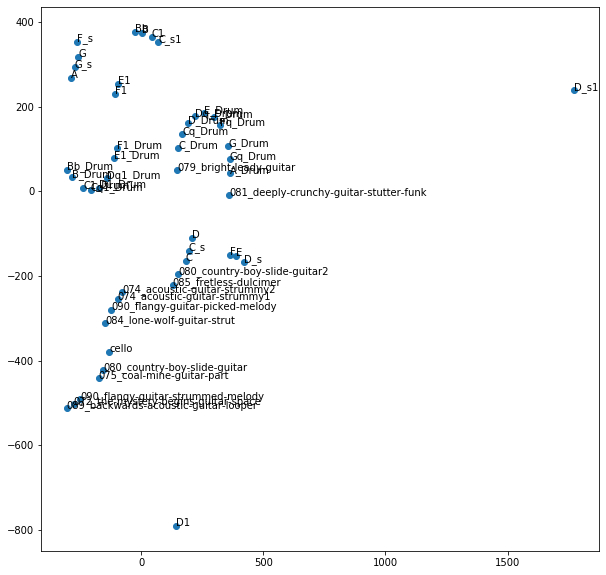

In [8]:
x_axis=model[:,0]
y_axis=model[:,1]
plt.figure(figsize = (10,10))
plt.scatter(x_axis, y_axis)
for i, txt in enumerate(names):
    plt.annotate(txt, (x_axis[i], y_axis[i]))
plt.show()

<IPython.core.display.Javascript object>


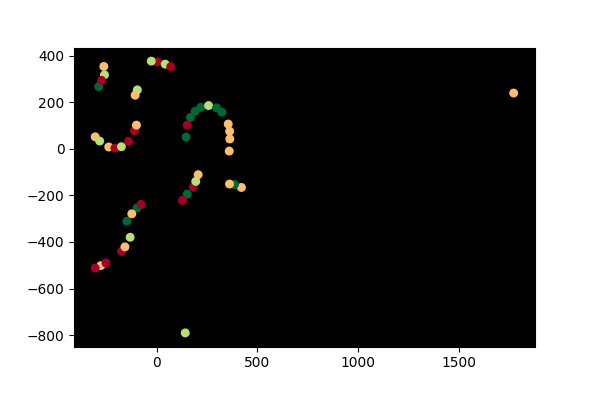

In [15]:
import winsound
import matplotlib.pyplot as plt
%matplotlib nbagg
import numpy as np; np.random.seed(1)
import mpld3
x = x_axis
y = y_axis

names = np.array(names)
c = np.random.randint(1,5,size=50)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c,s=30, cmap=cmap, norm=norm)
ax.set_facecolor("black")

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            winsound.PlaySound(sound_paths[ind["ind"][0]], winsound.SND_ASYNC | winsound.SND_ALIAS )
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                winsound.PlaySound(None, winsound.SND_ASYNC)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()
